In [27]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [3]:
df = pd.read_excel('mobility.xlsx')

In [4]:
df.columns

Index(['Name', 'TargetTestPointNumber', 'ElapsedTime', 'MeasurementTimeStamp',
       'Layer', 'SubTestNumber', 'ModelVerificationFlag', 'm_vehiclekg',
       'P_maxkW', 'numberofgears', 'ratio1', 'shift_downradsec',
       'shift_upradsec', 'PMaxW', 'masskg', 'EnergykWh', 'distancem',
       'Min_Speedmsec', 'v_uphillkmh', 'v_averagekmh', 'Distancekm',
       'Battery_masskg', 'Battery_capacitykWh', 'Rangekm', 't_a_50sec',
       't_AMSsec', 'E_consumptionkWh100km', 'revRangekm'],
      dtype='object')

In [5]:
from nsga import utils

In [16]:
kpi1 = df.t_a_50sec
kpi2 = df.E_consumptionkWh100km
kpi3 = df.revRangekm
des1 = df.P_maxkW

In [17]:
kpis = np.array([kpi1, kpi2, kpi3]).T

In [18]:
dna = np.array(des1).reshape(-1, 1)

In [19]:
people = [[dna[i], kpis[i]] for i, j in enumerate(kpis)]

In [20]:
pop = utils.create_population(people) #does the non dominant sorting allready!

In [21]:
paretos = np.array([ind.kpis for ind in pop.fronts[0]])
res = pd.DataFrame(paretos, columns=['t_a_50sec', 'E_consumptionkWh100km', 'revRangekm'])

In [22]:
pd.DataFrame(paretos, columns=['t_a_50sec', 'E_consumptionkWh100km', 'revRangekm']).to_excel('pareto.xlsx')

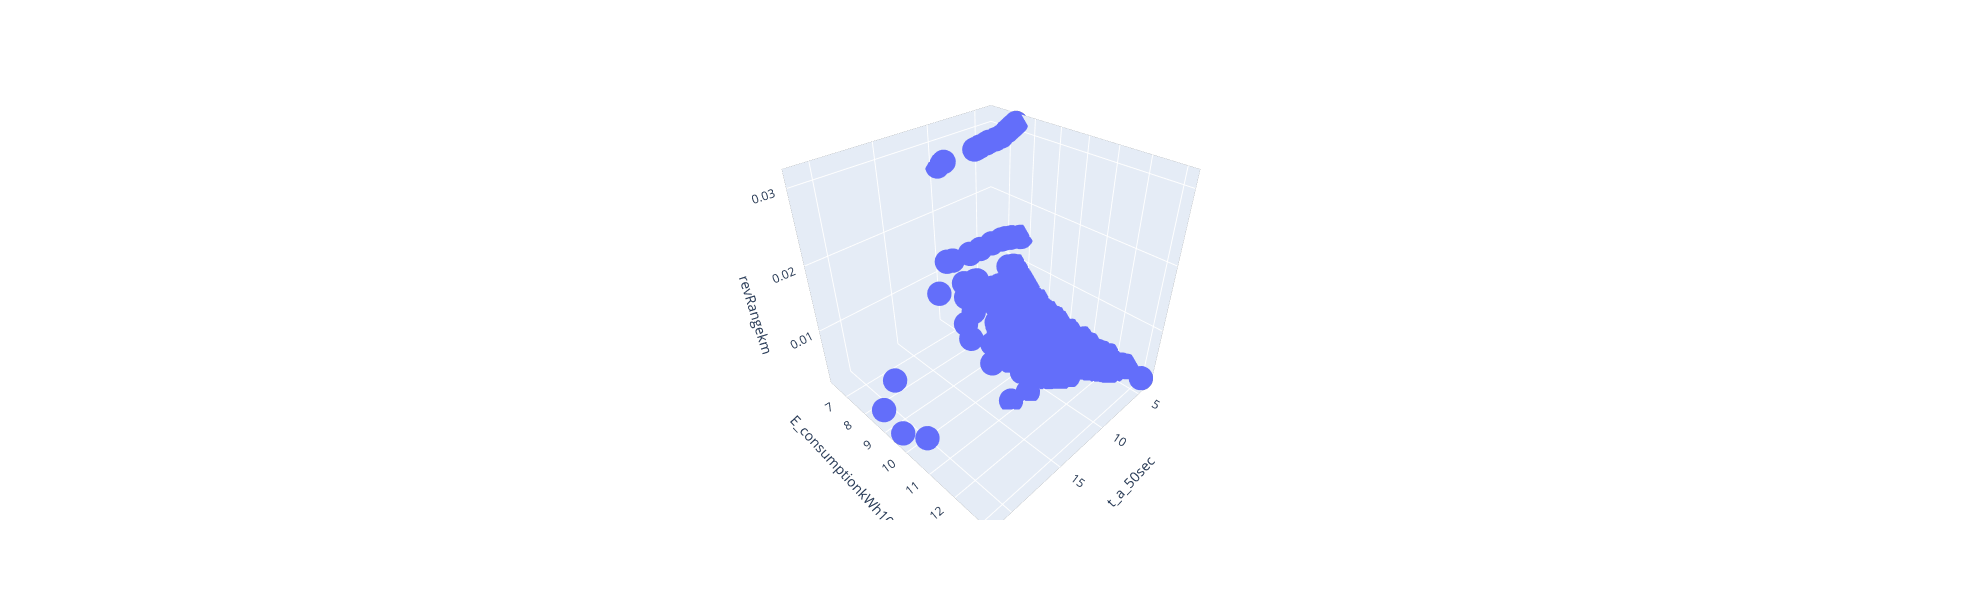

In [31]:
fig = px.scatter_3d(res, x='t_a_50sec', y='E_consumptionkWh100km', z='revRangekm')
fig.show()

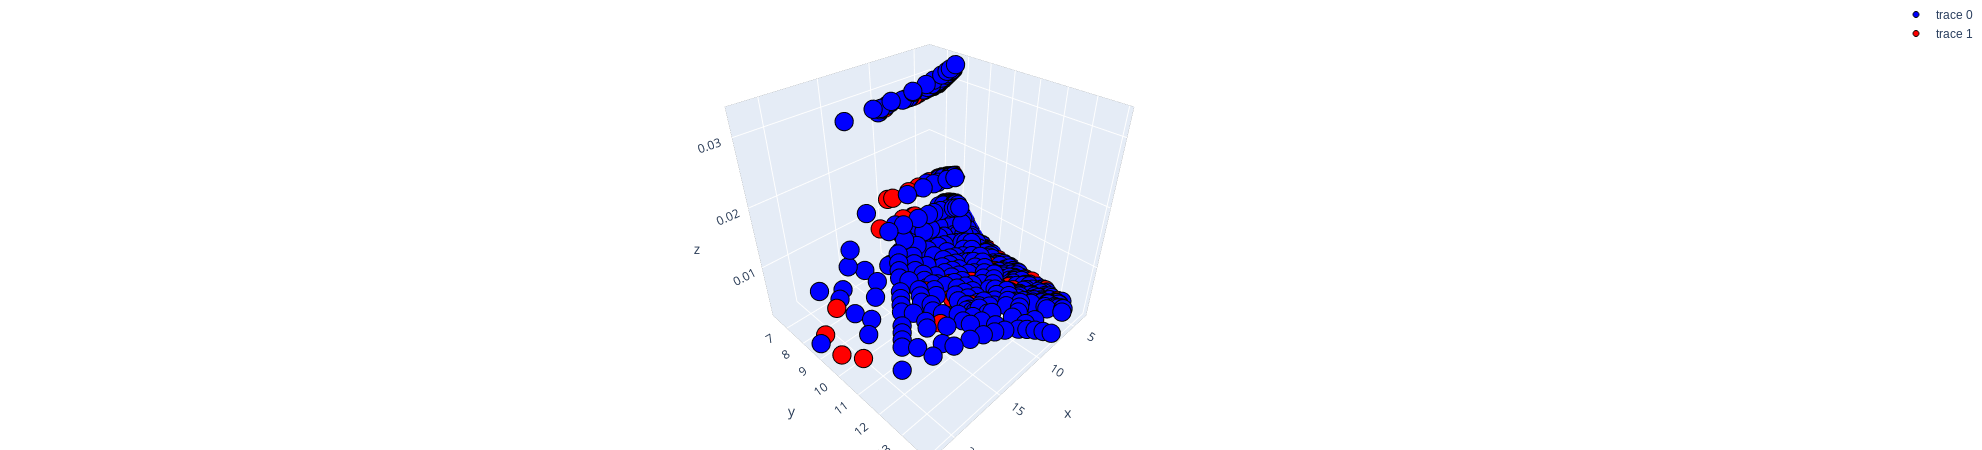

In [35]:
fig = go.Figure(data=[go.Scatter3d(
    x=df.t_a_50sec,
    y=df.E_consumptionkWh100km,
    z=df.revRangekm,
    mode='markers',
    marker=dict(
        size=6,
        color='blue',
        line=dict(width=1, color='black') # set color to an array/list of desired values
    )
),
                     go.Scatter3d(
    x=res.t_a_50sec,
    y=res.E_consumptionkWh100km,
    z=res.revRangekm,
    mode='markers',
    marker=dict(
        size=6,
        color='red',
        line=dict(width=1, color='black') # set color to an array/list of desired values
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
